# Cricket Fielding Performance Analysis Using Python

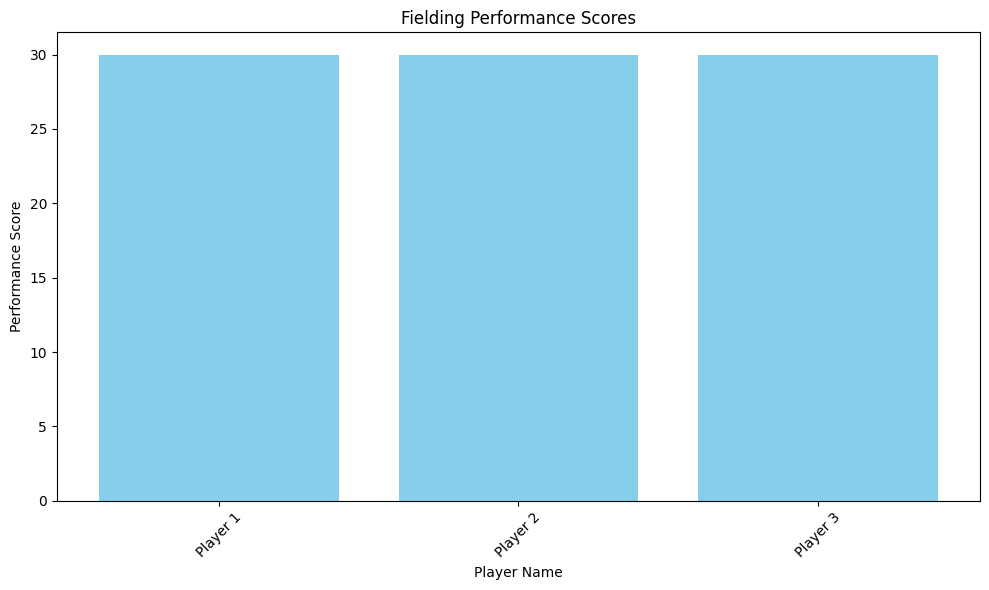

   Match No. Innings    Team Player Name  Ballcount    Position  \
0          1     1st  Team A    Player 1          1     Mid-off   
1          1     1st  Team A    Player 1          2       Cover   
2          1     1st  Team A    Player 1          3       Point   
3          1     1st  Team A    Player 1          4      Mid-on   
4          1     1st  Team A    Player 1          5  Square Leg   

  Short Description        Pick            Throw  Runs  Overcount      Venue  \
0             Catch  clean pick          run out     1          1  Stadium 1   
1         Run Saved  good throw  missed stumping    -1          2  Stadium 2   
2        Direct Hit      fumble   missed run out     0          3  Stadium 3   
3            Fumble   bad throw         stumping    -2          4  Stadium 1   
4           Run Out       catch          run out     1          5  Stadium 2   

   Performance Score  
0                 30  
1                 30  
2                 30  
3                 30  
4

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cricket_fielding_analysis.csv')

# Define weights for the performance metrics
weights = {
    'WCP': 1,   # Weight for Clean Picks
    'WGT': 1,   # Weight for Good Throws
    'WC': 2,    # Weight for Catches
    'WDC': -2,  # Weight for Dropped Catches
    'WST': 2,   # Weight for Stumpings
    'WRO': 2,   # Weight for Run Outs
    'WMRO': -1, # Weight for Missed Run Outs
    'WDH': 1    # Weight for Direct Hits
}

# Function to calculate performance score for a player
def calculate_performance_score(player_data):
    CP = (player_data['Pick'] == 'clean pick').sum()
    GT = (player_data['Pick'] == 'good throw').sum()
    C = (player_data['Pick'] == 'catch').sum()
    DC = (player_data['Pick'] == 'drop catch').sum()
    ST = (player_data['Throw'] == 'stumping').sum()
    RO = (player_data['Throw'] == 'run out').sum()
    MRO = (player_data['Throw'] == 'missed run out').sum()
    DH = (player_data['Short Description'] == 'Direct Hit').sum()
    RS = player_data['Runs'].sum()
    
    PS = (
        (CP * weights['WCP']) +
        (GT * weights['WGT']) +
        (C * weights['WC']) +
        (DC * weights['WDC']) +
        (ST * weights['WST']) +
        (RO * weights['WRO']) +
        (MRO * weights['WMRO']) +
        (DH * weights['WDH']) +
        RS
    )
    return PS

# Group data by Player Name and calculate performance scores
player_performance = df.groupby('Player Name').apply(calculate_performance_score).reset_index()
player_performance.columns = ['Player Name', 'Performance Score']

# Merge performance scores back to the original dataset
df = df.merge(player_performance, on='Player Name', how='left')

# Save the final dataset with performance scores to a new CSV file
df.to_csv('cricket_fielding_performance_analysis.csv', index=False)

# Plotting the performance scores using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(player_performance['Player Name'], player_performance['Performance Score'], color='skyblue')
plt.xlabel('Player Name')
plt.ylabel('Performance Score')
plt.title('Fielding Performance Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the final dataset
print(df.head())
